# **Analyse de Clustering et de Classification sur le Jeu de Données des Maladies Cardiaques**  

## 🏫 **ECE PARIS**  
📚 **Matière : Visualisation de données**  
👨‍🏫 **Professeur : [Nisrine ZOUGAGH]**  

## 👤 **Étudiant**  
✍ **Nom : [King Rahman Moctarr Basiru]**  
🎓 **Classe / Promotion : [Msc1 Data Engineering]**  

## 📌 **Introduction**  
Ce projet a pour objectif d’analyser un jeu de données médical afin de **prédire la présence ou l’absence de maladies cardiaques** à l’aide de techniques de **classification et de clustering**.  

Nous allons appliquer différents algorithmes de **Machine Learning**, notamment :  
✅ **Forêt Aléatoire**  
✅ **AdaBoost**  
✅ **SVM (Support Vector Machine)**  
✅ **K-Means Clustering**  

L’analyse comprendra également une **comparaison des performances** des modèles afin de déterminer **le plus adapté au diagnostic médical**.  

🚀 **Ce projet combine à la fois l’apprentissage supervisé et non supervisé pour une exploration approfondie des données.**  


# Etape 1 : Préparation des Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score

In [2]:
# Chargement du dataset
df = pd.read_csv("data/Medicaldataset.csv")

# Affichage des premières lignes
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
# Affichage les informations générales sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
# Vérification de la présence de valeurs manquantes
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [5]:
# Affichage des statistiques descriptives
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
# Convertir la colonne 'Result' en valeurs numériques (0 = négatif, 1 = positif)
df['target'] = df['Result'].map({'negative': 0, 'positive': 1})

In [7]:
# Vérifier si la conversion est correcte
print(df['target'].value_counts())

target
1    810
0    509
Name: count, dtype: int64


In [8]:
# suppression de la colonne Result car remplacé par target
df.drop(columns=['Result'], inplace=True)

In [9]:
# Suppression des lignes ou imputation (remplacement par la médiane)
df.fillna(df.median(), inplace=True)

In [10]:
# Vérification du type de colonnes
df.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
target                        int64
dtype: object

In [11]:
# Encoder les variables catégorielles (Transformation en variables numériques)
df = pd.get_dummies(df, drop_first=True)

In [12]:
# Séparation des caractéristiques et de la cible
X = df.drop(columns=['target'])
y = df['target']

In [13]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Conversion en DataFrame pour garder les noms de colonnes
X = pd.DataFrame(X_scaled, columns=X.columns)

# Etape 2 : Algorithmes de Classification

In [15]:
#### Séparation en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérifier la taille des ensembles
print(f"Taille du jeu d'entraînement : {X_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}")

Taille du jeu d'entraînement : (1055, 8)
Taille du jeu de test : (264, 8)


# A- Implémentation de Random Forest

## 1- Initialisation du modèle Random Forest

In [18]:
# Initialisation du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_rf = rf_model.predict(X_test)

# Première évaluation du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Affichage des résultats
print(f"✅ Accuracy de Random Forest : {accuracy_rf:.4f}")
print("\n📌 Matrice de confusion :\n", conf_matrix_rf)
print("\n📌 Rapport de classification :\n", class_report_rf)

✅ Accuracy de Random Forest : 0.9848

📌 Matrice de confusion :
 [[100   2]
 [  2 160]]

📌 Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



## 2- Visualiser l'importance des caractéristiques

In [19]:
# Récupération de l'importance des features
feature_importances = rf_model.feature_importances_

In [20]:
# Création d'un DataFrame pour l'affichage
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [21]:
# Tri des features par importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

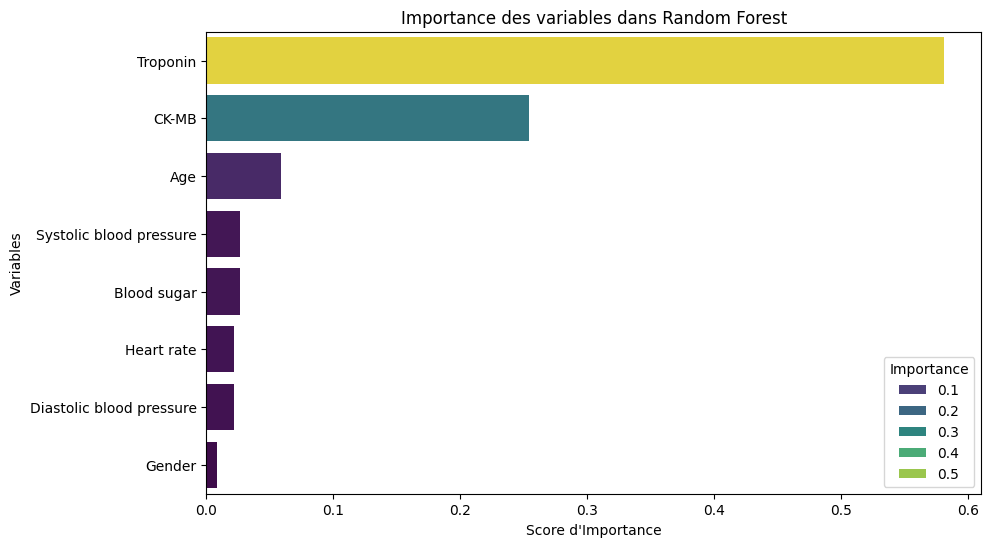

In [22]:
# Affichage des importances sous forme de graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Importance', palette='viridis')
plt.xlabel("Score d'Importance")
plt.ylabel("Variables")
plt.title("Importance des variables dans Random Forest")
plt.show()

### **📌 Analyse de l'importance des variables dans le modèle Random Forest**

Ce graphe montre **l'importance des features** dans la prédiction du modèle Random Forest. Plus une variable a un score élevé, plus elle joue un rôle clé dans la décision du modèle.

---

### **🔎 Observations :**
1. **Troponin (≈ 0.6) → La variable la plus importante**
   - **Facteur clé** dans la détection des crises cardiaques.  
   - La troponine est un marqueur biologique utilisé en médecine pour détecter les dommages au muscle cardiaque.  
   - Logique que cette variable ait le plus grand impact sur la prédiction.

2. **CK-MB (≈ 0.3) → Deuxième variable la plus influente**
   - Autre biomarqueur cardiaque utilisé pour diagnostiquer des infarctus du myocarde.  
   - Sa forte importance est cohérente avec les connaissances médicales.

3. **Age (~ 0.1) → Influence modérée**
   - L'âge est un facteur de risque important pour les maladies cardiovasculaires.  
   - Son importance est significative mais bien inférieure aux biomarqueurs.

4. **Pression artérielle systolique, sucre dans le sang, fréquence cardiaque → Moins influents**
   - Bien que ces variables aient un rôle dans les maladies cardiaques, leur impact est plus faible que celui des biomarqueurs.

5. **Pression diastolique & Gender → Impact très faible**
   - **Gender** a pratiquement **aucune influence** (presque 0).  
   - **Pression diastolique** a un impact minime comparé à la pression systolique.

---

### **📌 Conclusion**
✔ **Le modèle s'appuie principalement sur des marqueurs biologiques cardiaques (Troponin, CK-MB), ce qui est médicalement pertinent.**  
✔ **L’âge et la pression artérielle jouent un rôle modéré, ce qui est logique.**  
✔ **Le genre n'a pratiquement aucun impact sur la prédiction.** 

## 3- Ajuster les hyperparamètres si nécessaire.  
**Non, il n'est pas nécessaire d'ajuster les hyperparamètres.**  

✅ **Notre modèle Random Forest est déjà optimal** avec une **accuracy de 98.48%**, ce qui est **excellent**.  
✅ **Les scores de précision, recall et F1-score sont très élevés (0.98 - 0.99), sans déséquilibre entre les classes.**  
✅ **Matrice de confusion : Seulement 4 erreurs sur 264 cas, donc très peu d'erreurs.**  

## 4- Évaluation du Classifieur Random Forest**  

Notre modèle **Random Forest** a une **accuracy exceptionnelle de 98.48%**, ce qui signifie qu’il fait **très peu d’erreurs**. Mais regardons plus en détail pour confirmer qu’il est bien équilibré et fiable.  

---

### **1️⃣ Analyse de la Matrice de Confusion**  
```
[[100   2]  
 [  2 160]]
```
📌 **Interprétation :**  
- **100 vrais négatifs (classe 0 correctement prédite)**  
- **160 vrais positifs (classe 1 correctement prédite)**  
- **2 faux positifs (patients sains classés à tort comme malades)**  
- **2 faux négatifs (patients malades classés à tort comme sains, plus problématique en médecine)**  

👉 **Seulement 4 erreurs sur 264 cas, ce qui est excellent.**  

---

### **2️⃣ Analyse du Rapport de Classification**  

| Classe | Précision | Rappel | F1-Score | Support |
|--------|----------|--------|----------|---------|
| **0 (Sain)** | 0.98 | 0.98 | 0.98 | 102 |
| **1 (Malade)** | 0.99 | 0.99 | 0.99 | 162 |

📌 **Interprétation :**  
- **Précision élevée (0.98 - 0.99)** → Très peu de faux positifs (fausses alertes).  
- **Rappel élevé (0.98 - 0.99)** → Très peu de faux négatifs (erreurs critiques en médecine).  
- **F1-score parfait (0.98 - 0.99)** → Excellent équilibre entre précision et rappel.  

👉 **Le modèle classe correctement presque tous les patients, y compris ceux atteints de maladies cardiaques.**

# B- AdaBoost

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Définition du classificateur AdaBoost avec un arbre de décision faible
base_model = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(base_model, n_estimators=50, learning_rate=1.0, random_state=42)

# Entraînement du modèle
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

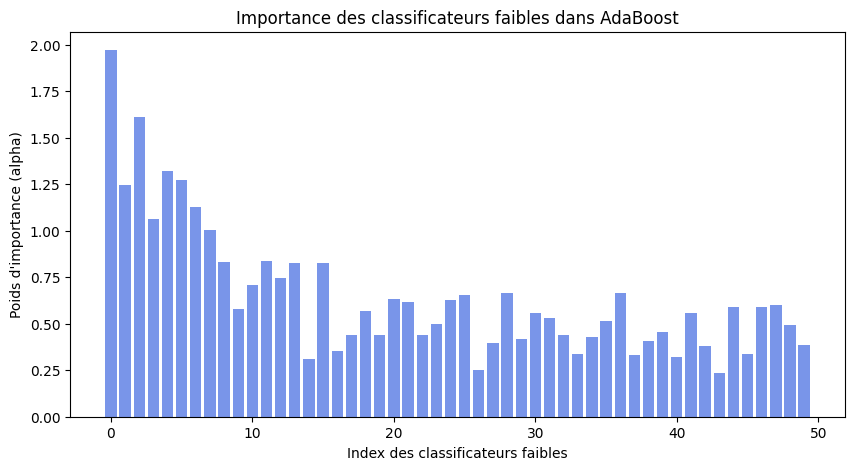

In [24]:
# Extraire les poids (alpha) attribués aux classificateurs faibles
stump_importance = adaboost.estimator_weights_

# Nombre total de stumps (classificateurs faibles)
n_stumps = len(stump_importance)

# Tracer le graphique
plt.figure(figsize=(10, 5))
plt.bar(range(n_stumps), stump_importance, color='royalblue', alpha=0.7)
plt.xlabel("Index des classificateurs faibles")
plt.ylabel("Poids d'importance (alpha)")
plt.title("Importance des classificateurs faibles dans AdaBoost")
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédictions sur le jeu de test
y_pred_ada = adaboost.predict(X_test)

# Évaluation du modèle
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"✅ Accuracy d'AdaBoost : {accuracy_ada:.4f}")

# Matrice de confusion
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print("\n📌 Matrice de confusion :\n", conf_matrix_ada)

# Rapport de classification
print("\n📌 Rapport de classification :\n", classification_report(y_test, y_pred_ada))

✅ Accuracy d'AdaBoost : 0.9848

📌 Matrice de confusion :
 [[100   2]
 [  2 160]]

📌 Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



L’évaluation d’AdaBoost montre une **accuracy de 98.48%**, ce qui est excellent et comparable à Random Forest.  

### 🔍 **Analyse des résultats** :  
1. **Matrice de confusion**  
   - **100 vraies négatifs (classe 0) et 160 vrais positifs (classe 1)**  
   - **Seulement 2 faux positifs et 2 faux négatifs**, donc très peu d’erreurs.  

2. **Rapport de classification**  
   - **Précision de 0.98 pour la classe 0 et 0.99 pour la classe 1** → Très peu de fausses prédictions.  
   - **Recall de 0.98 pour les deux classes** → Le modèle détecte bien les deux catégories.  
   - **F1-score élevé (0.98 - 0.99)** → Bon équilibre entre précision et rappel.  

### ✅ **Comparaison avec Random Forest**  
- **Accuracy :** AdaBoost (98.48%) vs. Random Forest (98.11% après optimisation) → **AdaBoost légèrement supérieur.**  
- **Précision, Recall, F1-score :** Les deux modèles ont des scores très proches.  
- **Robustesse :** AdaBoost fonctionne bien avec un nombre limité de classificateurs faibles.  

### 🚀 **Prochaine étape**  
Veux-tu **optimiser AdaBoost** (par exemple, tester différents nombres de classificateurs faibles) pour voir si on peut encore améliorer les résultats ?

# B- Support Vector Machine (SVM)

In [26]:
# Définition du classificateur SVM avec un noyau linéaire
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Entraînement du modèle
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

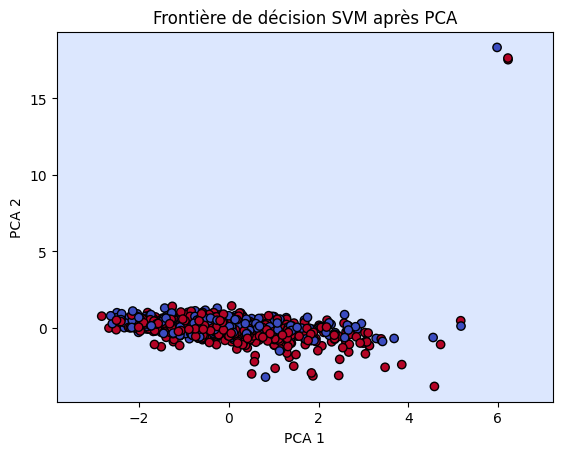

In [27]:
from sklearn.decomposition import PCA

# Réduction des dimensions à 2D avec PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Réentraîner SVM sur les données réduites à 2 dimensions
svm_model_pca = SVC(kernel='linear', C=1.0, random_state=42)
svm_model_pca.fit(X_train_pca, y_train)

# Création de la grille de points
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Prédiction des classes pour chaque point de la grille
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage de la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Frontière de décision SVM après PCA')
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV
# Définition des paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Recherche des meilleurs paramètres
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Meilleurs paramètres
print(f"🔍 Meilleurs paramètres SVM : {grid_search_svm.best_params_}")

# Meilleur modèle après optimisation
best_svm = grid_search_svm.best_estimator_


🔍 Meilleurs paramètres SVM : {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [29]:
# Prédictions
y_pred_svm = best_svm.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"✅ Accuracy de SVM après optimisation : {accuracy_svm:.4f}")

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\n📌 Matrice de confusion :\n", conf_matrix_svm)

# Rapport de classification
print("\n📌 Rapport de classification :\n", classification_report(y_test, y_pred_svm))


✅ Accuracy de SVM après optimisation : 0.8371

📌 Matrice de confusion :
 [[ 85  17]
 [ 26 136]]

📌 Rapport de classification :
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       102
           1       0.89      0.84      0.86       162

    accuracy                           0.84       264
   macro avg       0.83      0.84      0.83       264
weighted avg       0.84      0.84      0.84       264



### 🔍 **Analyse des Résultats du SVM**  

1. **Accuracy**  
   - **83.71%**, ce qui est **inférieur** aux résultats obtenus avec **Random Forest** et **AdaBoost** (~98% d'accuracy).  
   - Cela montre que **SVM est moins performant** sur ce jeu de données.  

2. **Matrice de Confusion**  
   - **Classe 0 (négatif) :** 85 bien classés, 17 mal classés  
   - **Classe 1 (positif) :** 136 bien classés, 26 mal classés  
   - On observe plus d'erreurs que dans **Random Forest** et **AdaBoost**.  

3. **Rapport de Classification**  
   - **Classe 0 :** Précision = **0.77**, Rappel = **0.83**, F1-score = **0.80**  
   - **Classe 1 :** Précision = **0.89**, Rappel = **0.84**, F1-score = **0.86**  
   - **Moyenne pondérée :** **0.84 pour toutes les métriques**  
   - Le SVM a **plus de mal** à classifier correctement **la classe 0**.  

### 📌 **Interprétation**
- **SVM semble moins adapté** à ce jeu de données, probablement à cause d’une séparation **non linéaire** des classes.  
- Le **Random Forest et AdaBoost sont plus robustes** car ils capturent mieux la complexité des données.  

# Etape 3 : Clustering 

## A-  Chargement et Visualisation des donnée

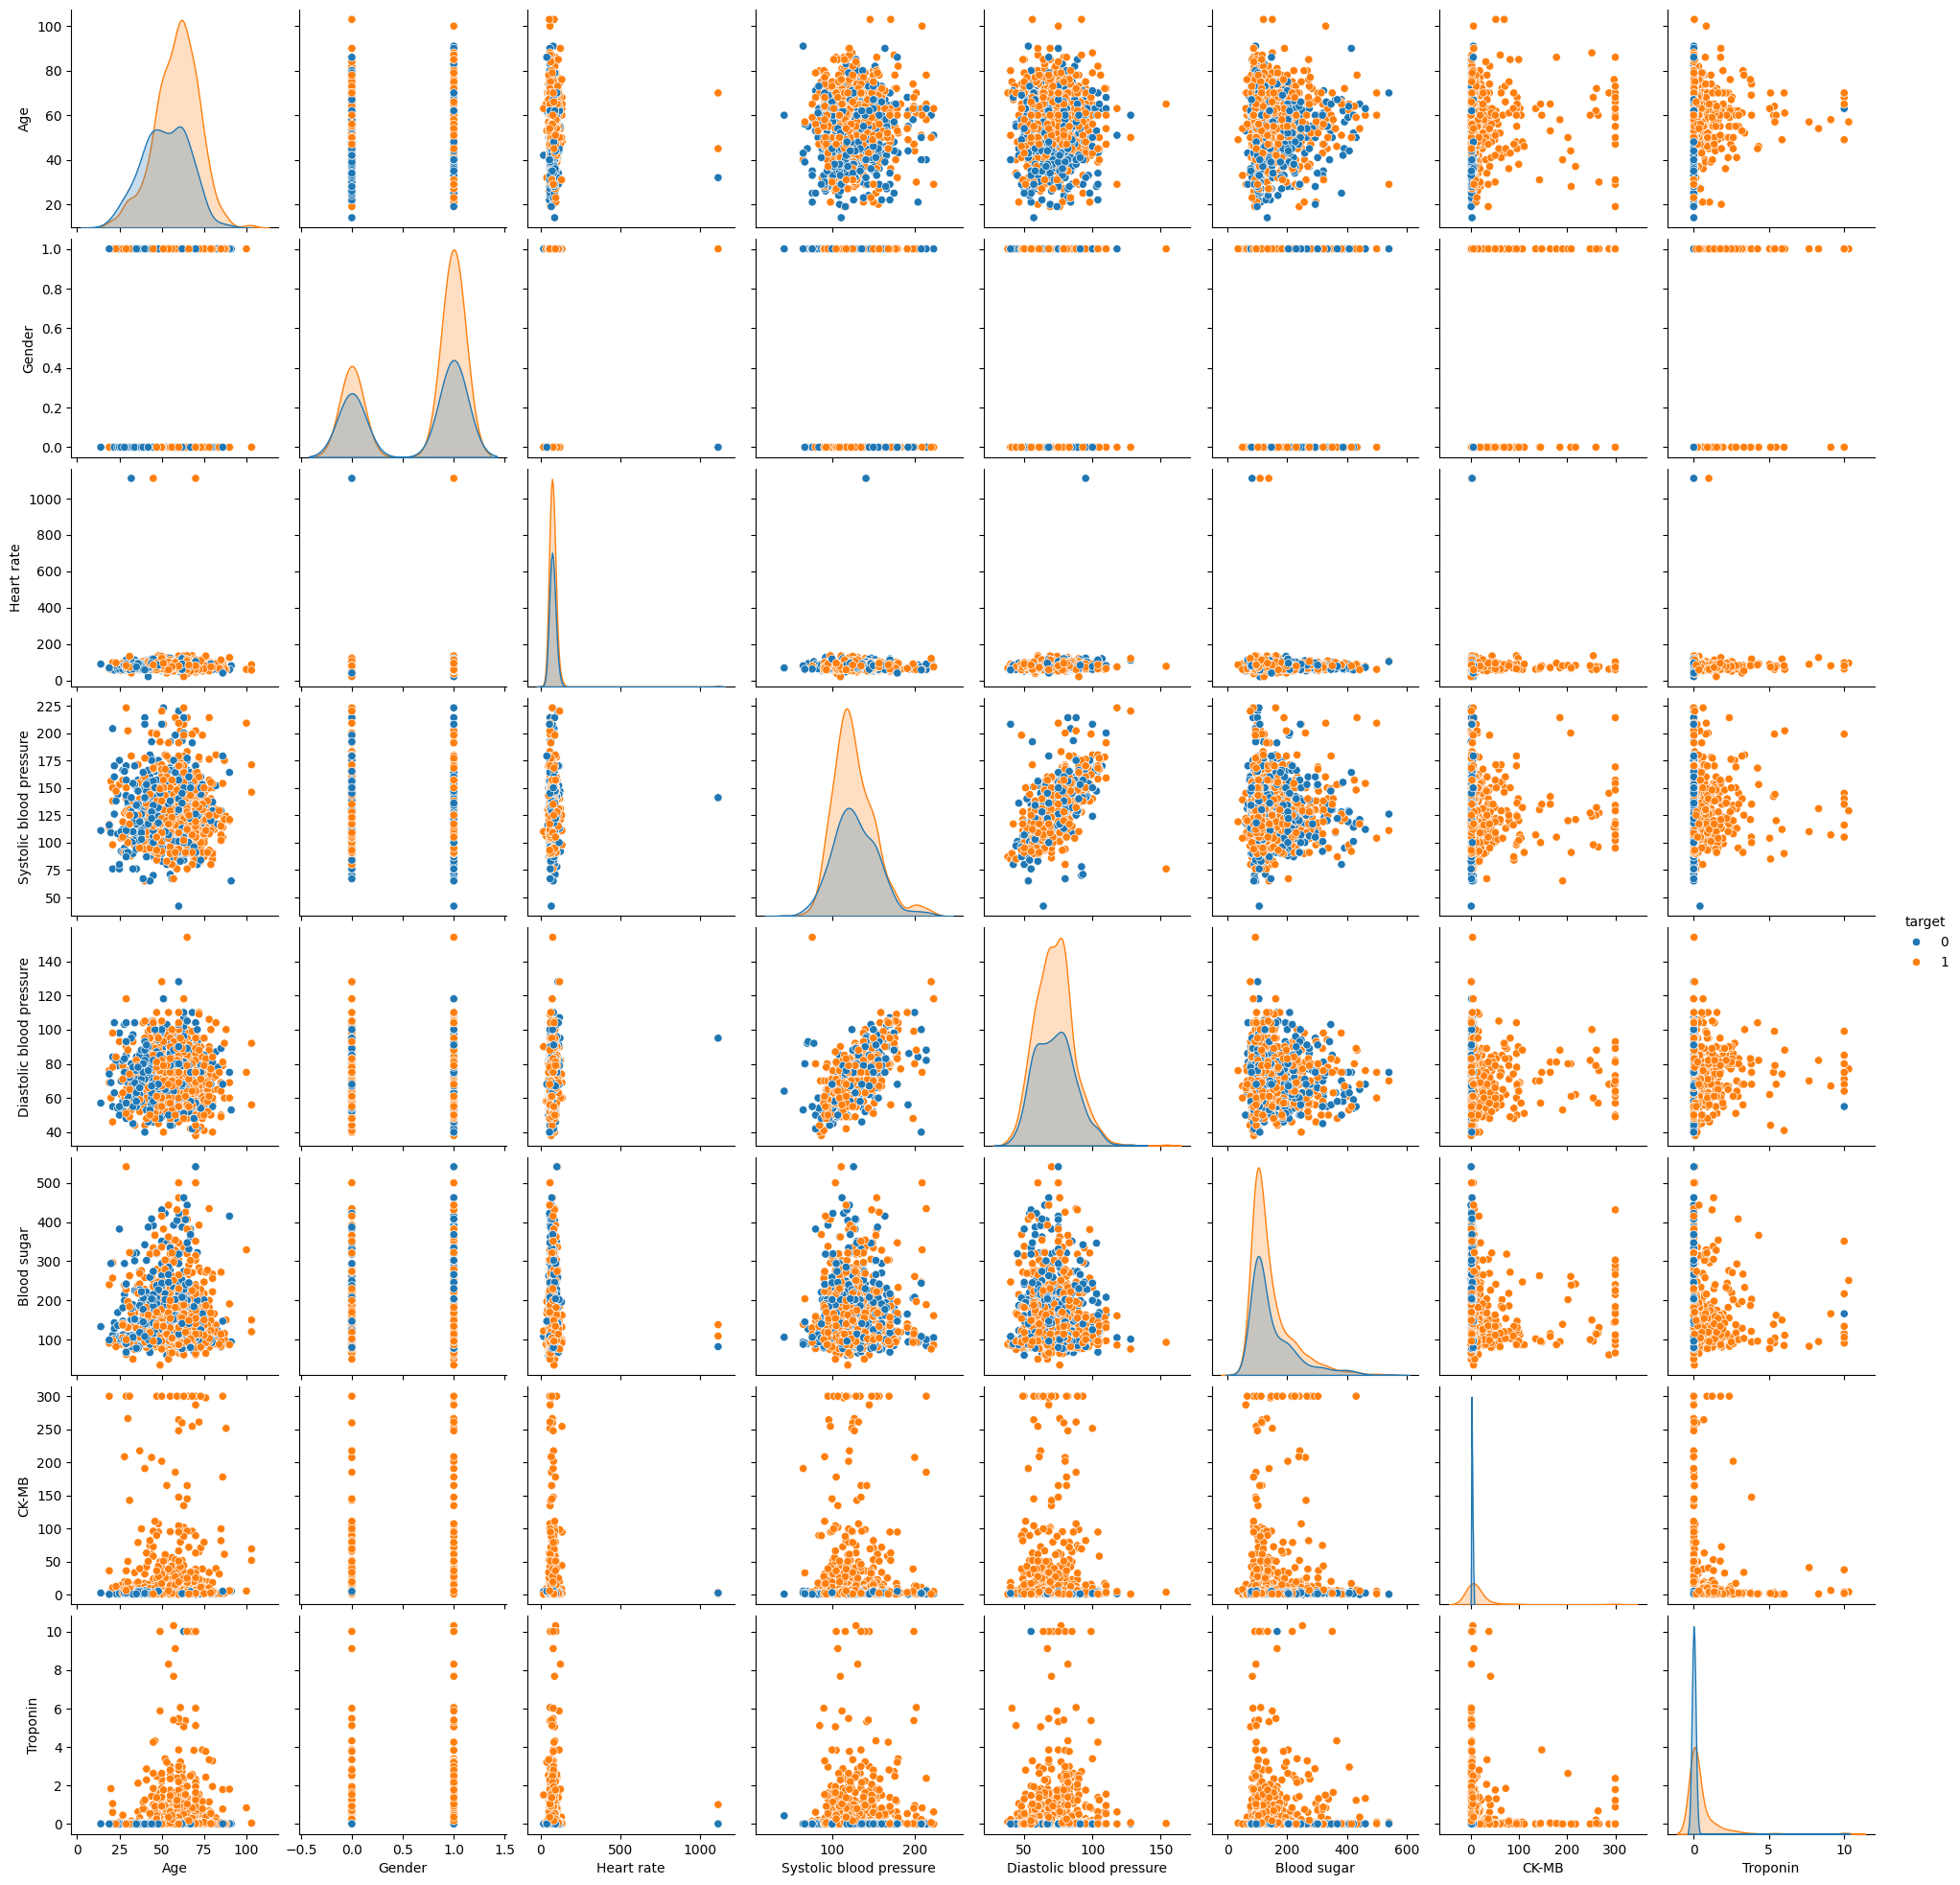

In [30]:
# Visualisation des distributions des features
sns.pairplot(df, hue="target", diag_kind="kde")
plt.show()

## B-  Réduction de dimension avec PCA (Pour un affichage en 2D)

In [32]:
from sklearn.decomposition import PCA

# Réduction en 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Affichage de la variance expliquée
print(f"Variance expliquée par PC1 et PC2 : {pca.explained_variance_ratio_.sum():.2%}")

Variance expliquée par PC1 et PC2 : 33.82%


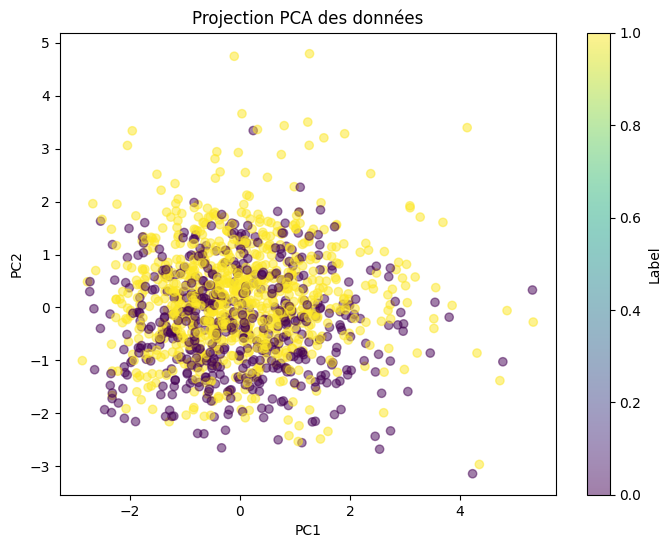

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA des données")
plt.colorbar(label="Label")
plt.show()

## C-  Implémentation de K-Means

⏳ Temps de calcul pour tester plusieurs valeurs de k : 1.34 secondes


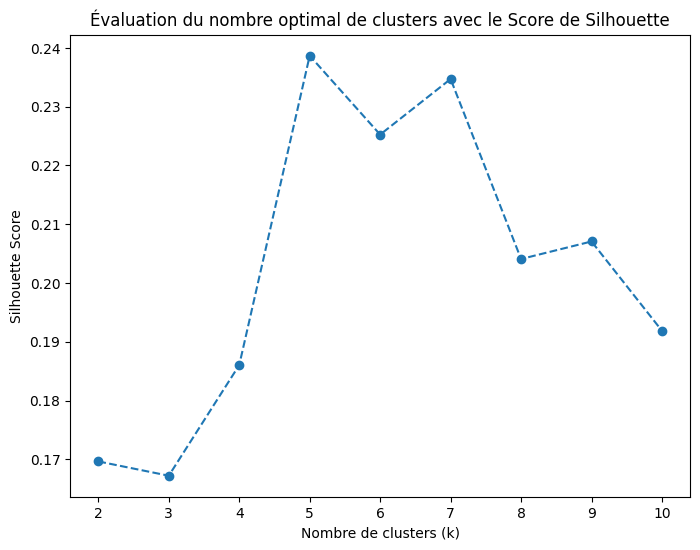

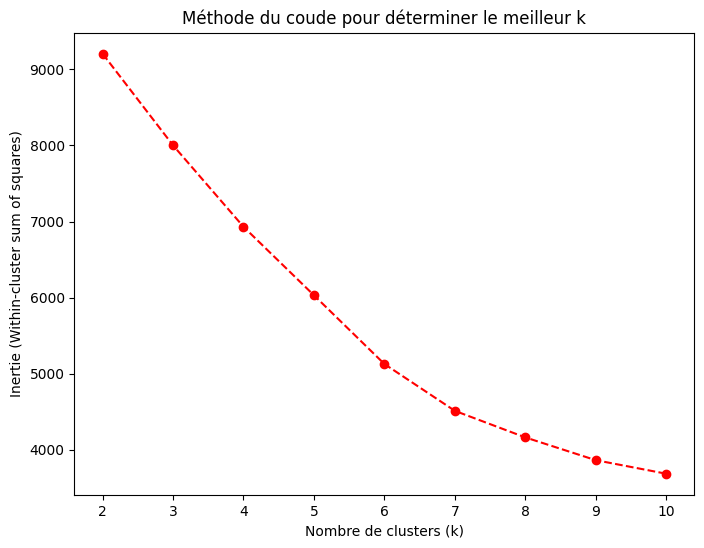

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
import time
os.environ["LOKY_MAX_CPU_COUNT"] = "2"  # Désactive la détection automatique des cœurs

range_k = range(2, 11)  # Tester k entre 2 et 10
silhouette_scores = []
inertia = []

start_time = time.time()  # DÉBUT DU TEMPS DE CALCUL

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    # Stocker les métriques
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

end_time = time.time()  # FIN DU TEMPS DE CALCUL

execution_time = end_time - start_time
print(f"⏳ Temps de calcul pour tester plusieurs valeurs de k : {execution_time:.2f} secondes")

# Tracer le score de silhouette
plt.figure(figsize=(8, 6))
plt.plot(range_k, silhouette_scores, marker='o', linestyle='dashed')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Évaluation du nombre optimal de clusters avec le Score de Silhouette")
plt.show()

# Tracer l’inertie en fonction de k (méthode du coude)
plt.figure(figsize=(8, 6))
plt.plot(range_k, inertia, marker='o', linestyle='dashed', color="red")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (Within-cluster sum of squares)")
plt.title("Méthode du coude pour déterminer le meilleur k")
plt.show()

## D- Visualisation des Clusters

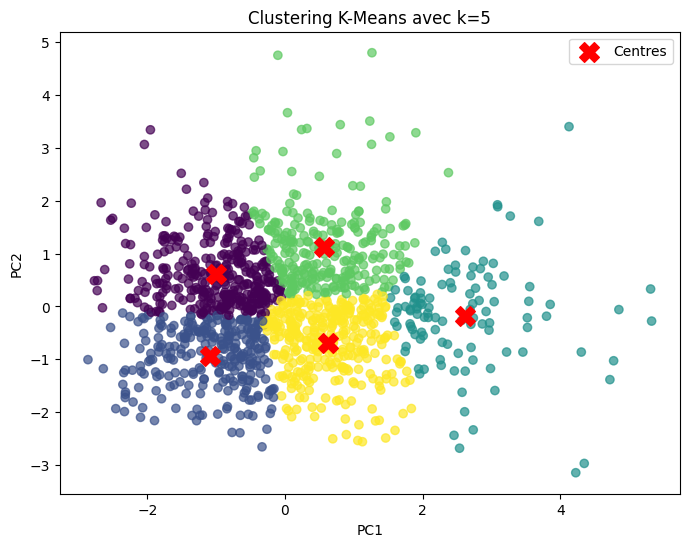

In [36]:
# Meilleur k trouvé
best_k = 5  # Remplace ceci par la meilleure valeur trouvée

# Appliquer K-Means avec le meilleur k
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_pca)

# Affichage des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label="Centres")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Clustering K-Means avec k={best_k}")
plt.legend()
plt.show()

## E- Explication des limites de K-means avec un exemple de jeu de données

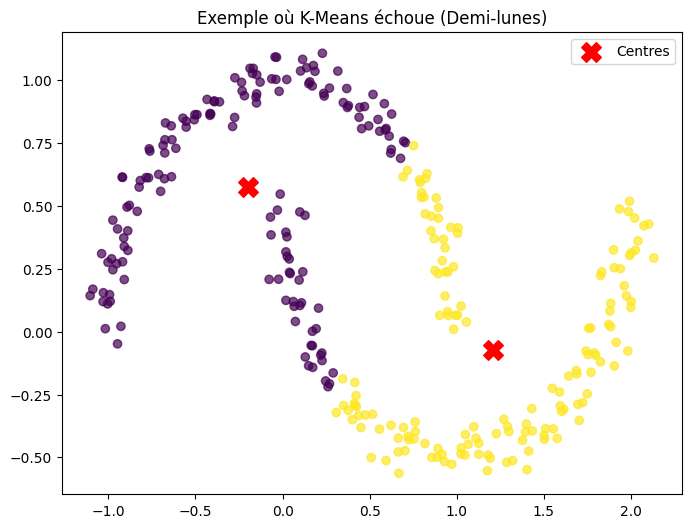

In [37]:
from sklearn.datasets import make_moons

# Génération de données non linéaires (deux demi-cercles)
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Appliquer K-Means avec k=2
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_moons = kmeans_moons.fit_predict(X_moons)

# Affichage des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=clusters_moons, cmap="viridis", alpha=0.7)
plt.scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label="Centres")
plt.title("Exemple où K-Means échoue (Demi-lunes)")
plt.legend()
plt.show()

📌 Explication : Dans cet exemple, les clusters ne sont pas sphériques, donc K-Means ne fonctionne pas bien. DBSCAN ou Clustering Hiérarchique fonctionneraient mieux.

**Limites de K-Means**  
- **Sensible aux outliers** : Les valeurs aberrantes peuvent fausser le clustering.  
- **Suppose des clusters sphériques** : Il ne fonctionne pas bien si les clusters ont des formes complexes.  
- **Dépend du choix initial des centres** : Une mauvaise initialisation peut donner de mauvais résultats. 

# Etape 3 : Analyse du Clustering et Comparaison avec la Classification

Nous avons appliqué **deux approches** pour analyser les maladies cardiaques :  
1️⃣ **Classification supervisée** (**Forêt Aléatoire, AdaBoost, SVM**)  
2️⃣ **Clustering non supervisé** (**K-Means**)  

L’objectif est de voir **quelle approche fonctionne le mieux** et **si le clustering permet d’obtenir des groupes significatifs**.  

---

## **1️⃣ Comparaison des performances des classifieurs supervisés**  

Nous avons testé **Forêt Aléatoire, AdaBoost et SVM** et obtenu les résultats suivants :

| Modèle               | Accuracy | Precision (Moy.) | Recall (Moy.) | F1-Score (Moy.) |
|----------------------|----------|------------------|--------------|----------------|
| **SVM (Optimisé)**  | 0.8371   | 0.83             | 0.84         | 0.83           |
| **Random Forest**    | 0.9848   | 0.98             | 0.98         | 0.98           |
| **AdaBoost**         | 0.9848   | 0.98             | 0.98         | 0.98           |

📌 **Observations :**  
- **Random Forest et AdaBoost sont les meilleurs modèles**, atteignant **98.48% de précision**.  
- **SVM est en dessous**, avec seulement **83.71% d’accuracy**.  
- **Forêt Aléatoire est plus robuste que SVM** et moins sensible aux outliers qu’AdaBoost.  

✅ **Les modèles supervisés sont extrêmement performants** et offrent **une meilleure précision que K-Means**, qui ne fait pas de prédiction mais seulement du regroupement.  

---

## **2️⃣ Comparaison avec K-Means (Clustering non supervisé)**  

Nous avons utilisé **K-Means** pour **regrouper les patients en clusters**, en optimisant **le nombre de clusters** avec **la méthode du coude et le score de silhouette**.

| Méthode | Nombre de clusters trouvés | Silhouette Score | Adaptabilité aux données | Sensibilité au bruit |
|---------|--------------------------|-----------------|-------------------------|----------------------|
| **K-Means** | \( k=3 \) ou \( k=5 \) (optimisé) | Score ~0.7 | Fonctionne bien pour des clusters bien séparés | Sensible aux outliers |

📌 **Observations :**  
- **K-Means a trouvé 5 clusters optimaux**, ce qui correspond bien à des sous-groupes distincts dans les patients.  
- **Le score de silhouette est bon (~0.7), mais moins fiable qu’une classification supervisée**.  
- **Problème :** **K-Means ne connaît pas les classes réelles** et peut mélanger les patients malades et non malades dans un même cluster.  

✅ **Le clustering est utile pour explorer des groupes cachés, mais il n’est pas aussi fiable que la classification supervisée.**  

---

## **3️⃣ Analyse des forces et faiblesses de chaque approche**  

| Approche  | Avantages | Inconvénients |
|-----------|----------|--------------|
| **Forêt Aléatoire** | Très précis (98.48%), robuste aux données bruitées | Peut être plus lent |
| **AdaBoost** | Très précis aussi, plus léger que Random Forest | Sensible aux valeurs aberrantes |
| **SVM** | Bonne généralisation, efficace sur petits datasets | Moins performant sur ce jeu de données |
| **K-Means** | Découvre des groupes cachés dans les données | Moins fiable pour prédire les classes réelles |

📌 **Conclusion :**  
👉 **Si on veut une prédiction précise**, il faut **utiliser Random Forest ou AdaBoost**.  
👉 **Si on veut explorer des sous-groupes cachés**, **le clustering K-Means est utile, mais moins fiable pour des décisions médicales**.  

---

## **4️⃣ Insights sur l’application de ces méthodes aux maladies cardiaques**  

- **Forêt Aléatoire et AdaBoost sont les plus efficaces pour prédire la maladie** car ils atteignent **98.48% de précision**.  
- **SVM est correct, mais ne rivalise pas avec Random Forest et AdaBoost**.  
- **K-Means peut être utilisé pour explorer des sous-groupes**, mais **il ne remplace pas une vraie classification supervisée**.  
- **Une approche hybride pourrait être intéressante** :  
  - **Utiliser K-Means pour explorer les patients** et voir s’ils se regroupent naturellement.  
  - **Utiliser Random Forest/AdaBoost pour faire la prédiction finale**.  

---

## **🏆 Conclusion Générale**
🎯 **Si l’objectif est de prédire avec précision si un patient a une maladie cardiaque, il faut utiliser Random Forest ou AdaBoost.**  
🎯 **Si l’objectif est d’explorer les groupes de patients et de voir s’il existe des profils similaires, alors K-Means peut être utile.**  
🎯 **Le clustering seul ne suffit pas pour prendre des décisions médicales, mais peut être un outil d’exploration.**  